重要抽样法的思路是，对被积函数做变换使其在积分区间内的起伏变小  
对被积函数做如下变换  
$$\int_{0}^{1}f(x)dx=\int_{0}^{1}\frac{f(x)}{g(x)}g(x)dx=\int_{0}^{1}\frac{f(x)}{g(x)}dG(x)$$
取形状和$f(x)$相似的$g(x)$可以使$f(x)/g(x)$在积分区域内起伏很小，从而减小误差  
由于变换后随机点不再均匀分布而是按分布函数$G(x)$分布，所以选取$g(x)$时还要注意随机数是否容易产生

计算积分$I=\int_{0}^{\pi}\sin^2{x}dx$  
先将积分区域变换到$[0,1]$区间，计算最终结果时再恢复  
原始蒙特卡洛方法

In [1]:
import numpy as np
from numpy.random import default_rng
import matplotlib.pyplot as plt

rng = default_rng()

In [2]:
# 变换后的被积函数
def integrand(x):
    return np.sin(np.pi*x)**2

In [3]:
N = 10**6
X = rng.random(N)
Y = integrand(X)
I = np.pi*sum(Y)/N
print(f"结果：{I}")
I0 = np.pi/2
print(f"误差：{abs(I0-I)/I0:.4%}")

结果：1.5725558456029773
误差：0.1120%


重要抽样法  
积分区域内被积函数的形状如下

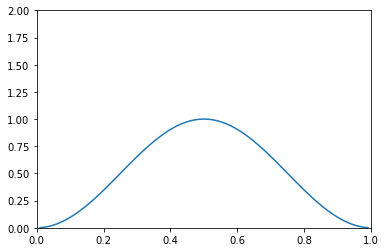

In [4]:
x = np.linspace(0.01, 0.99, 99)
f = integrand(x)
plt.plot(x, f)
plt.xlim((0,1))
plt.ylim((0,2))
plt.show()

$f(x)$有3处导数为0，据此可以构建一个形状相似的四次函数作为$g(x)$，$g(x)$的抽样可以通过舍选法完成  
取$g(x)=30(-x^2+x)^2$

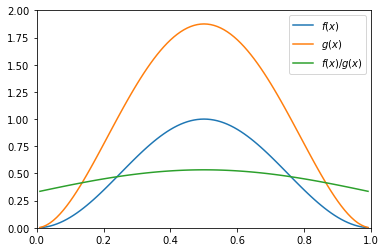

In [5]:
g = 30*(-x**2+x)**2
plt.plot(x, f, label="$f(x)$")
plt.plot(x, g, label="$g(x)$")
plt.plot(x, f/g, label="$f(x)/g(x)$")
plt.legend(loc='upper right')
plt.xlim((0,1))
plt.ylim((0,2))
plt.show()

经过变换后，被积函数的起伏减小了

In [6]:
# 用舍选法进行抽样
def sample_g():
    xi_1, xi_2 = rng.random(2)
    while (-xi_1**2+xi_1)**2*16 < xi_2:
        xi_1, xi_2 = rng.random(2)
    return xi_1
X = np.array([sample_g() for _ in range(N)])

In [7]:
# 计算积分的估计值
Y = (integrand(X)/(30*((-X**2+X)**2)))
I = np.pi*sum(Y)/N
print(f"结果：{I}")
I0 = np.pi/2
print(f"误差：{abs(I0-I)/I0:.4%}")

结果：1.5708410919525015
误差：0.0028%


使用蒙特卡罗方法计算定积分时，一般都要先把积分区间变换到[0,1]，但是使用重要抽样法时可以不用这么做  
$$\int_{-\infty}^{+\infty}f(x)dx=\int_{-\infty}^{+\infty}\frac{f(x)}{g(x)}g(x)dx=\int_{0}^{1}\frac{f(x)}{g(x)}dG(x)$$
不论积分区间如何，经过变换后$G(x)$的取值范围总是[0,1]